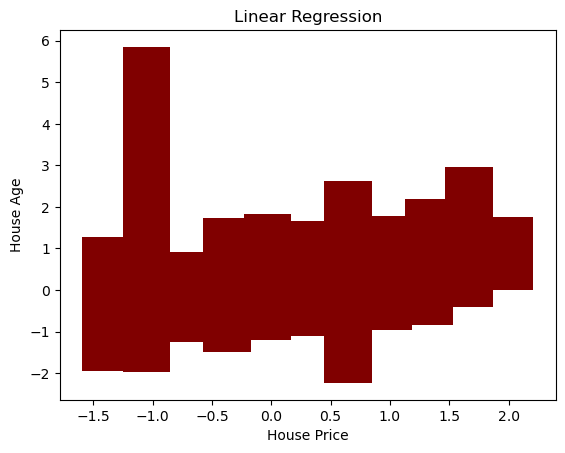

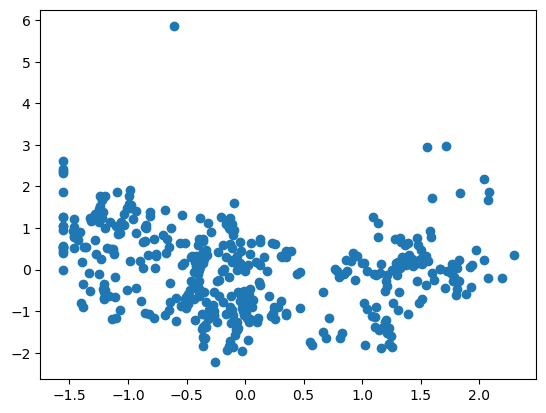

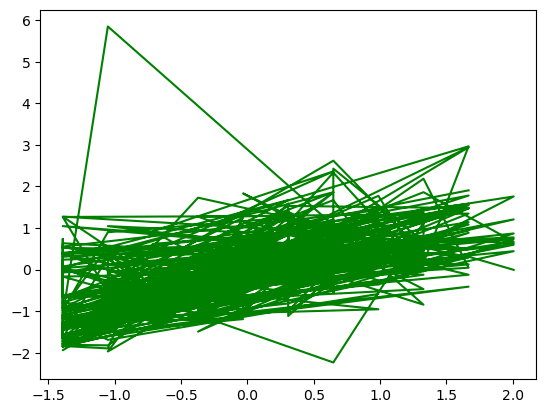

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
import numpy as np
import pandas as pd
import matplotlib as mptlb
import matplotlib.pyplot as plt
import random as rn
d = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')
d.head()
d.shape
hse_age = np.array(d['X2 house age'])
hse_age = (hse_age - np.mean(hse_age)) / np.std(hse_age)
cnv_stre = np.array(d['X4 number of convenience stores'])
cnv_stre = (cnv_stre - np.mean(cnv_stre)) / np.std(cnv_stre)
#to normalize the data
latt = np.array(d['X5 latitude'])
longt = np.array(d['X6 longitude'])
latt = (latt - np.mean(latt)) / np.std(latt)
longt = (longt - np.mean(longt)) / np.std(longt)
dist = np.array(d['X3 distance to the nearest MRT station'])
dist = (dist - np.mean(dist)) / np.std(dist)
n = len(longt)

w1 = 0
w2 = 0
w3 = 0
w4 = 0
w5 = 0
b = 0
y_price = np.array(d['Y house price of unit area'] / 500)
y_price = ((y_price) - np.mean(y_price)) / np.std(y_price)
y_pred = w1 * hse_age + w2 * cnv_stre + w3 * latt + w5 * dist + w4 * longt + b
# to plot bar graph
plt.bar(cnv_stre, y_price, color ='maroon', width = 0.4)
 
plt.xlabel("House Price")
plt.ylabel("House Age")
plt.title("Linear Regression")
plt.show()
# to plot scatterplot
plt.scatter(hse_age, y_price)
plt.show()
plt.plot(cnv_stre, y_price, color = "green")
plt.show()
print(type(y_pred), type(y_price))

# gradient descent algorithm


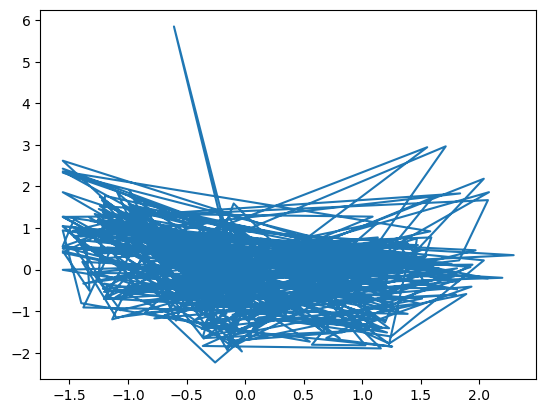

In [11]:
plt.plot(hse_age, y_price)
plt.show()

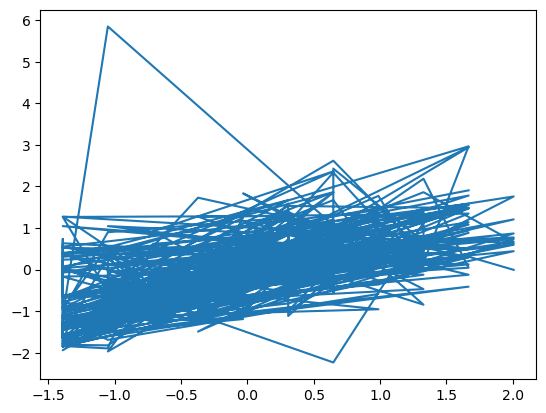

In [12]:
plt.plot(cnv_stre,y_price)
plt.show()

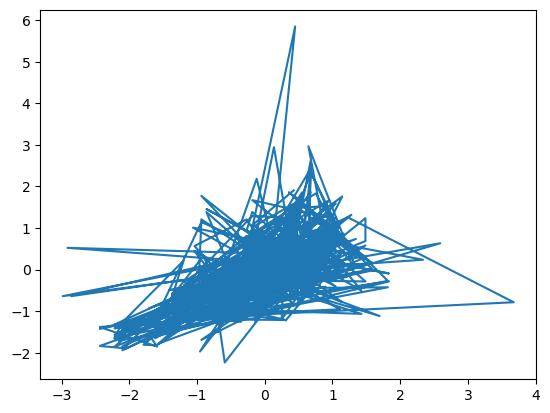

In [13]:
plt.plot(latt, y_price)
plt.show()

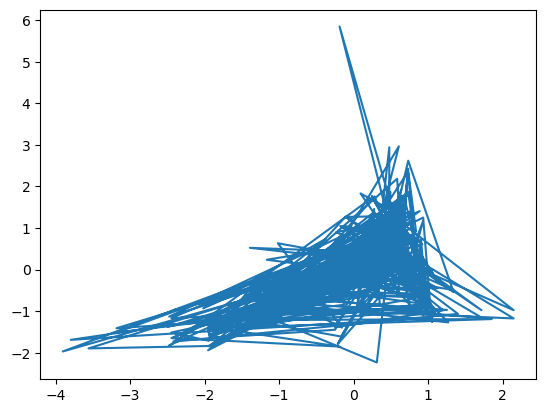

In [14]:
plt.plot(longt, y_price)
plt.show()

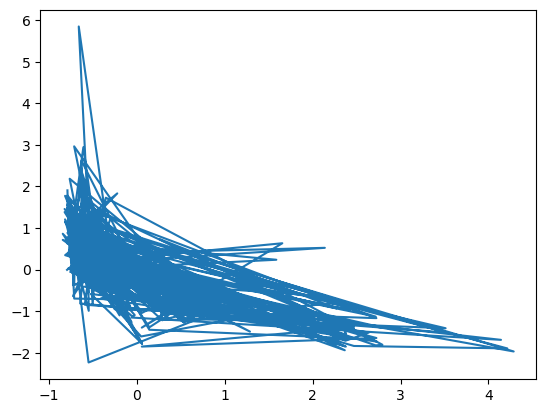

In [15]:
plt.plot(dist, y_price)
plt.show()

In [16]:
d.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


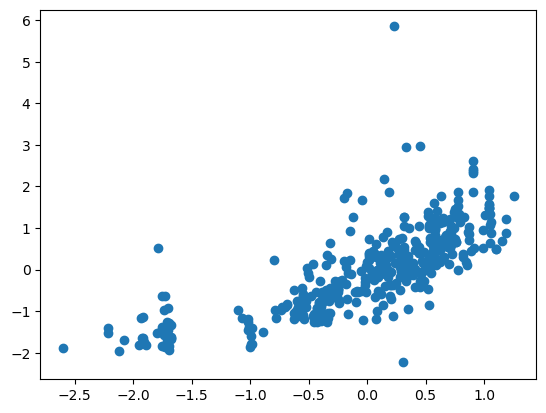

In [17]:
alpha = 0.1
for i in range(10000):
    y_pred = w1 * hse_age + w2 * cnv_stre + w5 * dist + w3 * latt + w4 * longt + b

    w1_derivative = (1 / n) * np.sum((y_pred - y_price) * hse_age)
    w2_derivative = (1 / n) * np.sum((y_pred - y_price) * cnv_stre)
    w3_derivative = (1 / n) * np.sum((y_pred - y_price) * latt)
    w4_derivative = (1 / n) * np.sum((y_pred - y_price) * longt)
    w5_derivative = (1 / n) * np.sum((y_pred - y_price) * dist)
    b_derivative = (1 / n) * np.sum(y_pred - y_price)
    
    w1 = w1 - alpha * w1_derivative
    w2 = w2 - alpha * w2_derivative
    w3 = w3 - alpha * w3_derivative
    w4 = w4 - alpha * w4_derivative
    w5 = w5 - alpha * w5_derivative
    b = b - alpha * b_derivative

plt.scatter(y_pred, y_price)

In [18]:
from sklearn.metrics import r2_score
score = r2_score(y_price, y_pred)
print("The accuracy of our model is {}%".format(round(score, 5) *100))


The accuracy of our model is 57.116%
